**Coding Question:** What's the product of the following two 64-digit numbers?

3141592653589793238462643383279502884197169399375105820974944592

2718281828459045235360287471352662497757247093699959574966967627

In [10]:
import math
import numpy as np
import pandas as pd
import random
import time
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import seaborn as sns
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', 500)
%matplotlib inline 
%config InlineBackend.figure_format='retina'
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [11]:


def splits_digits(num, split_n):
    '''This function finds high and low points for a 
    division'''
    high, low = divmod(num, 10**split_n)
    return high, low

def get_integer_digits_fast(n):
    # This is a fast approach to get the digits number
    if n == 0:
        return 1
    else:
        return int(math.log10(n))+1
    
def get_integer_digits_slow(n):
    # Slower approach for getting integer digits nunber
    return len(str(n))

def karatsuba(num_1, num_2):
    if (num_1 < 10) & (num_2 < 10):
        return num_1 * num_2
    split_n = max(get_integer_digits_fast(num_1), get_integer_digits_fast(num_2)) // 2
    a, b = splits_digits(num_1, split_n)
    c, d = splits_digits(num_2, split_n)
    comp1 = karatsuba(a, c)
    comp2 = karatsuba(b, d)
    comp3 = karatsuba(a + b, c + d)
    return comp1 * 10**(2 * split_n) + (comp3 - comp1 - comp2) * 10**(split_n) + comp2
    
num_1 = 3141592653589793238462643383279502884197169399375105820974944592
num_2 = 2718281828459045235360287471352662497757247093699959574966967627
print(karatsuba(num_1, num_2) == num_1 * num_2)

True


In [13]:
# Plotting O(n) vs. O(n^2) vs. O(n^1.585)
result = []
rep = 1000
max_digit = 15
random_nums_1 = [0] * rep
random_nums_2 = [0] * rep
for i in range(max_digit):
    low_lim = 10**i
    high_lim = 10**(i + 1) - 1
    for j in range(rep):
        random_nums_1[j] = random.randint(low_lim, high_lim)
        random_nums_2[j] = random.randint(low_lim, high_lim)
    t0 = time.time()
    for j in range(rep):
        karatsuba(random_nums_1[j], random_nums_2[j])
    t1 = time.time()
    result.append(t1 - t0)
    print("Time taken for {0:s} repetion of {1:02d} digits: {2:1.5f}".format(str(rep), i, t1 - t0))

Time taken for 1000 repetion of 00 digits: 0.00079
Time taken for 1000 repetion of 01 digits: 0.01514
Time taken for 1000 repetion of 02 digits: 0.02919
Time taken for 1000 repetion of 03 digits: 0.04725
Time taken for 1000 repetion of 04 digits: 0.07030
Time taken for 1000 repetion of 05 digits: 0.08873
Time taken for 1000 repetion of 06 digits: 0.11080
Time taken for 1000 repetion of 07 digits: 0.13253
Time taken for 1000 repetion of 08 digits: 0.20173
Time taken for 1000 repetion of 09 digits: 0.22409
Time taken for 1000 repetion of 10 digits: 0.24528
Time taken for 1000 repetion of 11 digits: 0.27429
Time taken for 1000 repetion of 12 digits: 0.29243
Time taken for 1000 repetion of 13 digits: 0.38457
Time taken for 1000 repetion of 14 digits: 0.48320


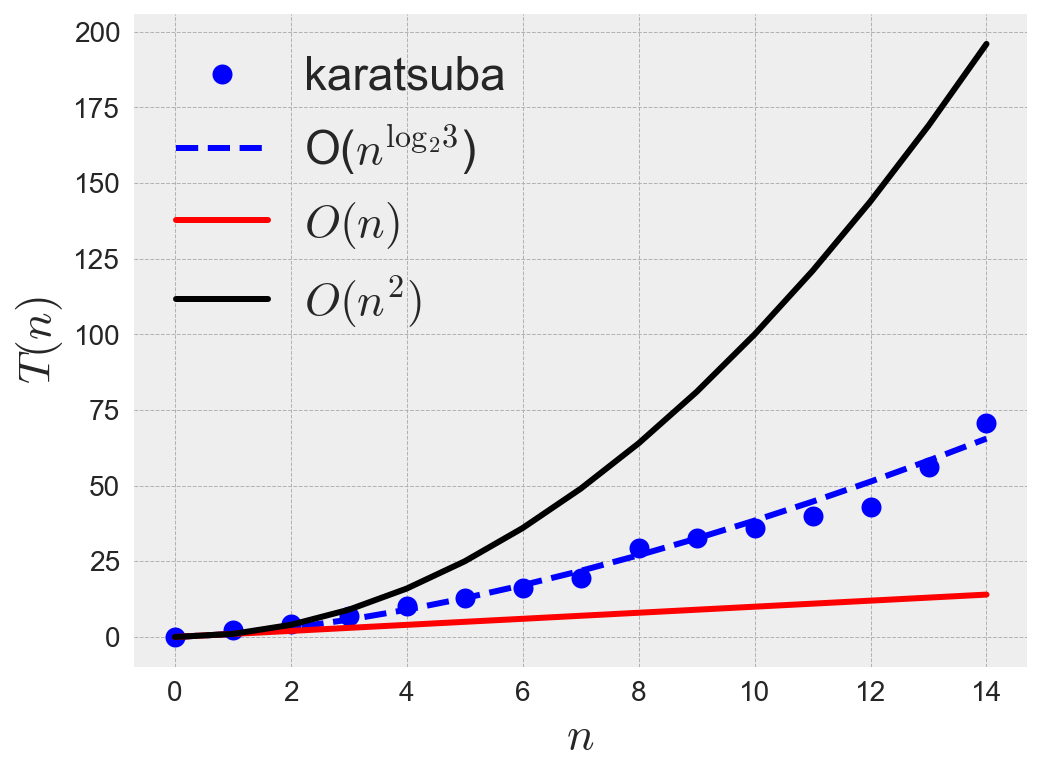

In [36]:
coef = np.log2(3)
ratio_for_plot = (1/4)*(result[3] / 3**coef + result[7] / 7**coef + + result[10] / 10**coef + result[-1] / max_digit**coef)
plt.plot(np.array(result)/ratio_for_plot, "bo", label="karatsuba", markersize=10)
plt.plot([i**1.585 for i in range(max_digit)], "b--", label="O($n^{\log_23}$)", linewidth=3)
plt.plot(range(max_digit), "r", label="$O(n)$", linewidth=3)
plt.plot([i**2 for i in range(max_digit)], "k", label="$O(n^{2})$", linewidth=3)
plt.legend(prop={'size': 23})
plt.xlabel('$n$', fontsize=23)
plt.ylabel('$T(n)$', fontsize=23)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Number of Inversions

In [37]:
# Reading the file
numbers = []
with open('inversions.txt') as f:
    for line in f:
        data = line.split()
        numbers.append(int(data[0]))

In [79]:
def combining_sorted_arrays(left, right):
    n_left = len(left)
    n_right = len(right)
    result = [0] * (n_left + n_right)
    inversions = 0
    n_result = len(result)
    i, j, k = 0, 0, 0
    while ((i < n_left) & (j < n_right) & (k < n_result)):
        if left[i] <= right[j]:
            result[k] = left[i]
            i += 1
        else:
            result[k] = right[j]
            inversions += n_left - i
            # print(inversions)
            j += 1
        k += 1
    while (i < n_left):
        result[k] = left[i]
        i += 1
        k += 1
    while (j < n_right):
        result[k] = right[j]
        j += 1
        k += 1
    return result, inversions
            
    
    
def inversion_counter(d):
    n = len(d)
    if n <= 1:
        return d, 0
    mid = n // 2
    left_sorted, inv_left = inversion_counter(d[:mid])
    # print(left_sorted, inv_left)
    right_sorted, inv_right = inversion_counter(d[mid:])
    # print(right_sorted, inv_right)
    result, inversions = combining_sorted_arrays(left_sorted, right_sorted)
    return result, inversions + inv_left + inv_right

In [82]:
_, inv_final = inversion_counter(numbers)
inv_final

2407905288

In [81]:
inversion_counter([1, 3, 5, 2, 4, 6])


([1, 2, 3, 4, 5, 6], 3)